## 1. Import necessary libraries

In [35]:
# Import necessary libraries
import pandas as pd               # For data manipulation and analysis
import numpy as np                # For numerical computations
import matplotlib.pyplot as plt # For plotting graphs
from sklearn import linear_model  # For building linear regression models
from sklearn.metrics import mean_squared_error, r2_score  # For evaluating model performance
import pickle 

## 2. Load and Explore the Dataset

In [5]:
# Load the molecule solubility dataset from the CSV file into a DataFrame
molecule_solubility_data = pd.read_csv('molecule_solubility_dataset.csv')

In [7]:
# Display the first 5 rows of the dataset
molecule_solubility_data.head()

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.5954,167.850,0.0,0.0,-2.18
1,2.3765,133.405,0.0,0.0,-2.00
2,2.5938,167.850,1.0,0.0,-1.74
3,2.0289,133.405,1.0,0.0,-1.48
4,2.9189,187.375,1.0,0.0,-3.04


In [8]:
# Get information about the dataset
molecule_solubility_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1144 entries, 0 to 1143
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MolLogP             1144 non-null   float64
 1   MolWt               1144 non-null   float64
 2   NumRotatableBonds   1144 non-null   float64
 3   AromaticProportion  1144 non-null   float64
 4   logS                1144 non-null   float64
dtypes: float64(5)
memory usage: 44.8 KB


In [9]:
# Describing the dataset
molecule_solubility_data.describe()

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
count,1144.000000,1144.000000,1144.000000,1144.000000,1144.000000
mean,2.449133,204.631675,2.173951,0.364932,-3.057997
std,1.866003,102.620500,2.627398,0.343305,2.096502
min,-7.571400,16.043000,0.000000,0.000000,-11.600000
25%,1.414900,122.126000,0.000000,0.000000,-4.332250
50%,2.340300,183.594500,1.000000,0.375000,-2.870500
75%,3.406475,270.715750,3.000000,0.666667,-1.600000
max,10.388600,780.949000,23.000000,1.000000,1.580000


## 3. Preprocess the Dataset

In [10]:
# Count the number of duplicate rows
duplicate_rows_count = molecule_solubility_data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows_count}")

Number of duplicate rows: 15


In [19]:
# Drop the duplicate rows
molecule_solubility_data.drop_duplicates(inplace=True)

In [20]:
# Count the number of duplicate rows again to verity their removal
duplicate_rows_count = molecule_solubility_data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows_count}")

Number of duplicate rows: 0


## 4. Prepare the Features and Target Variable

In [24]:
# Prepare the features (X) by dropping the target variable 'logS' from the dataset
X = molecule_solubility_data.drop(['logS'], axis=1)

# Prepare the target variable (y) by selecting only the 'logS' column from the dataset
y = molecule_solubility_data['logS']

In [25]:
X

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


## 5. Build and Evaluate the Linear Regression Model

In [27]:
# Initialize a linear regression model
linear_regression_model = linear_model.LinearRegression()
# Fit the model using the features (X) and target variable (y)
linear_regression_model.fit(X, y)

# Predict the target variable (logS) using the trained model and features (X)
predicted_target = linear_regression_model.predict(X)
# Display the predicted values
predicted_target

array([-2.77354829, -2.38666188, -2.76899683, ..., -4.73996978,
       -4.19490932, -2.62760275])

In [28]:
# Print the coefficients of the linear regression model
print('Coefficients:', linear_regression_model.coef_)
# Print the intercept of the linear regression model
print('Intercept:', linear_regression_model.intercept_)

# Calculate the mean squared error (MSE) between actual and predicted target values
mse = mean_squared_error(y, predicted_target)
# Print the mean squared error
print('Mean squared error (MSE): %.2f' % mse)

# Calculate the coefficient of determination (R^2) score
r2 = r2_score(y, predicted_target)
# Print the coefficient of determination
print('Coefficient of determination (R^2): %.2f' % r2)

Coefficients: [-0.73906085 -0.00653523  0.00336896 -0.4488639 ]
Intercept: 0.24154854704316442
Mean squared error (MSE): 1.01
Coefficient of determination (R^2): 0.77


## 6. Visualize the Model Performance

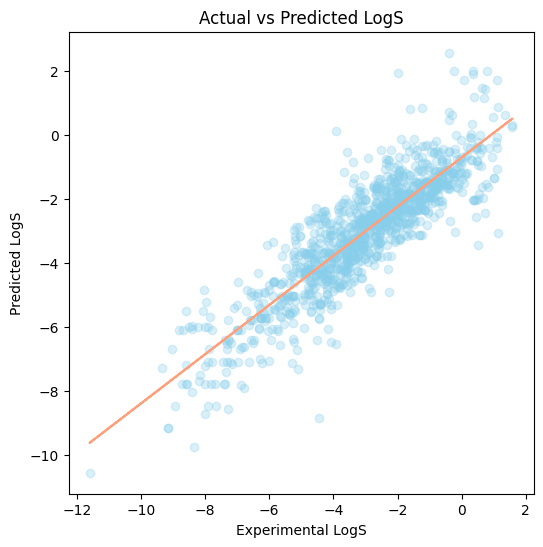

In [34]:
# Visualize the relationship between actual and predicted LogS values, along with a trendline,to assess the performance of the linear regression model.

# Set the size of the figure
plt.figure(figsize=(6, 6))

# Plot actual vs predicted LogS values
plt.scatter(x=y, y=predicted_target,c="#87CEEB", alpha=0.3)

# Add trendline
trendline_coeffs = np.polyfit(y, predicted_target, 1)
trendline_polynomial = np.poly1d(trendline_coeffs)
plt.plot(y, trendline_polynomial(y), "#FFA07A")

# Set labels for axes
plt.xlabel('Experimental LogS')
plt.ylabel('Predicted LogS')

# Set title for the plot
plt.title('Actual vs Predicted LogS')

# Show the plot
plt.show()

## 7. Save the Model

In [37]:
# Save the model
pickle.dump(linear_regression_model, open('LogS_Prediction_Model.pkl', 'wb'))

## 8. Build a Streamlit Web App

#### Please refer to the streamlit_app.py file for the implementation of the streamlit web application.